# Latin America GDP analysis

## Marcelo José Rovai

### UCSanDiegoX: DSE200x - Python for Data Science 

Download database from: 
https://www.kaggle.com/worldbank/world-development-indicators


List of indicators: 
https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data

List of countries:
https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data

## Initial exploration of the Dataset

In [64]:
# Import libraries
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=12,8

In [53]:
# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [54]:
# read Database
df = pd.read_csv('./world-development-indicators/Indicators.csv')
df.shape # 5,656,458 rows imported; with 6 colunms

(5656458, 6)

In [55]:
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [57]:
# Number of UNIQUE countries
countries = df['CountryName'].unique().tolist()
len(countries)

247

In [58]:
# Number of countries codes (should be the same # countries)
countryCodes = df['CountryCode'].unique().tolist()
len(countryCodes)

247

In [59]:
# indicators 
indicators = df['IndicatorName'].unique().tolist()
len(indicators)

1344

In [60]:
# Years of data
years = df['Year'].unique().tolist()
len(years)

56

In [61]:
# Range of years
print(min(years)," to ",max(years))

1960  to  2015


## Latin America (LATAM) data

### Main Latin America Countries GPD growth over year

In [62]:
# select GDP Per capita for select countries
hist_indicator = 'GDP per capita \(constant 2005'
mask1 = df['IndicatorName'].str.contains(hist_indicator)

mask2 = df['CountryCode'].str.contains('ARG')
gdp_ar = df[mask1 & mask2]

mask2 = df['CountryCode'].str.contains('BRA')
gdp_br = df[mask1 & mask2]

mask2 = df['CountryCode'].str.contains('CHL')
gdp_ch = df[mask1 & mask2]

mask2 = df['CountryCode'].str.contains('COL')
gdp_co = df[mask1 & mask2]

mask2 = df['CountryCode'].str.contains('VEN')
gdp_ve = df[mask1 & mask2]

mask2 = df['CountryCode'].str.contains('MEX')
gdp_mx = df[mask1 & mask2]

Graph values

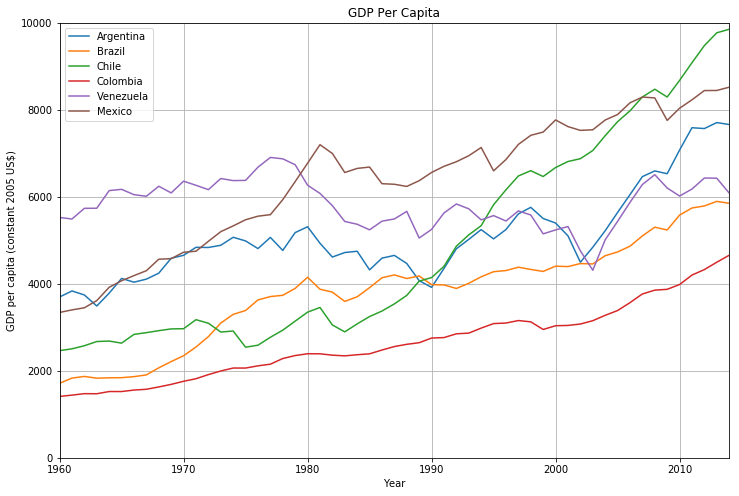

In [66]:
# line plot
plt.plot(gdp_ar['Year'].values, gdp_ar['Value'].values)
plt.plot(gdp_br['Year'].values, gdp_br['Value'].values)
plt.plot(gdp_ch['Year'].values, gdp_ch['Value'].values)
plt.plot(gdp_co['Year'].values, gdp_co['Value'].values)
plt.plot(gdp_ve['Year'].values, gdp_ve['Value'].values)
plt.plot(gdp_mx['Year'].values, gdp_mx['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_br['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita')

# Include Legend
plt.legend(("Argentina", "Brazil", "Chile", "Colombia", "Venezuela", "Mexico"))

# to make more honest, start they y axis at 0
plt.axis([1960, 2014,0,10000])
plt.grid()
plt.show()

### LATAM on 60's and 70's 

In [69]:
# Filter for years before 1980 
filter_year = df[df.Year <= 1980]

In [70]:
# select GDP Per capita for select countries
hist_indicator = 'GDP per capita \(constant 2005'
mask1 = filter_year['IndicatorName'].str.contains(hist_indicator)

mask2 = filter_year['CountryCode'].str.contains('ARG')
gdp_ar = filter_year[mask1 & mask2]

mask2 = filter_year['CountryCode'].str.contains('BRA')
gdp_br = filter_year[mask1 & mask2]

mask2 = filter_year['CountryCode'].str.contains('CHL')
gdp_ch = filter_year[mask1 & mask2]

mask2 = filter_year['CountryCode'].str.contains('COL')
gdp_co = filter_year[mask1 & mask2]

mask2 = filter_year['CountryCode'].str.contains('VEN')
gdp_ve = filter_year[mask1 & mask2]

mask2 = filter_year['CountryCode'].str.contains('MEX')
gdp_mx = filter_year[mask1 & mask2]

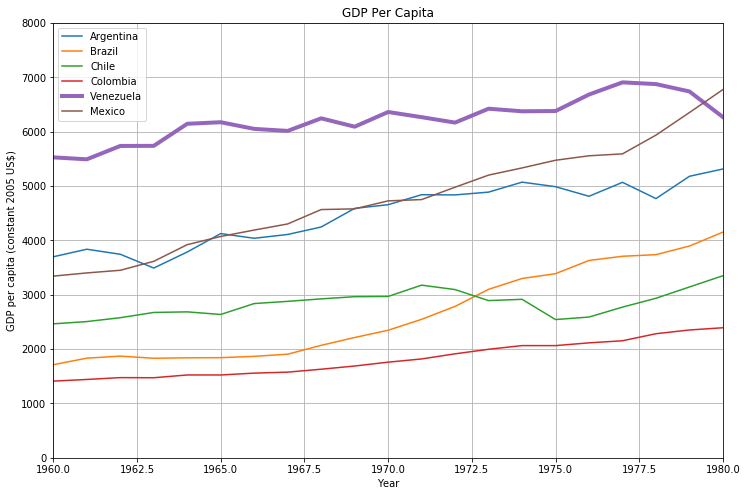

In [71]:
# line plot
plt.plot(gdp_ar['Year'].values, gdp_ar['Value'].values)
plt.plot(gdp_br['Year'].values, gdp_br['Value'].values)
plt.plot(gdp_ch['Year'].values, gdp_ch['Value'].values)
plt.plot(gdp_co['Year'].values, gdp_co['Value'].values)
plt.plot(gdp_ve['Year'].values, gdp_ve['Value'].values, linewidth=4)
plt.plot(gdp_mx['Year'].values, gdp_mx['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_br['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita')

# Include Legend
plt.legend(("Argentina", "Brazil", "Chile", "Colombia", "Venezuela", "Mexico"))

# to make more honest, start they y axis at 0
plt.axis([1960, 1980,0,8000])
plt.grid()
plt.show()

<p>From 1960 to 1980 analyzed countries had growth.</p>
<p>Venezuela has the highest GDP per capita in the region</p>

### LATAM from 80's to 90's 

In [72]:
# Filter for years between 1981 and 2000 
filter_year = df[(df.Year > 1980) & (df.Year <= 2000)]

In [73]:
# select GDP Per capita for select countries
hist_indicator = 'GDP per capita \(constant 2005'
mask1 = filter_year['IndicatorName'].str.contains(hist_indicator)

mask2 = filter_year['CountryCode'].str.contains('ARG')
gdp_ar = filter_year[mask1 & mask2]

mask2 = filter_year['CountryCode'].str.contains('BRA')
gdp_br = filter_year[mask1 & mask2]

mask2 = filter_year['CountryCode'].str.contains('CHL')
gdp_ch = filter_year[mask1 & mask2]

mask2 = filter_year['CountryCode'].str.contains('COL')
gdp_co = filter_year[mask1 & mask2]

mask2 = filter_year['CountryCode'].str.contains('VEN')
gdp_ve = filter_year[mask1 & mask2]

mask2 = filter_year['CountryCode'].str.contains('MEX')
gdp_mx = filter_year[mask1 & mask2]

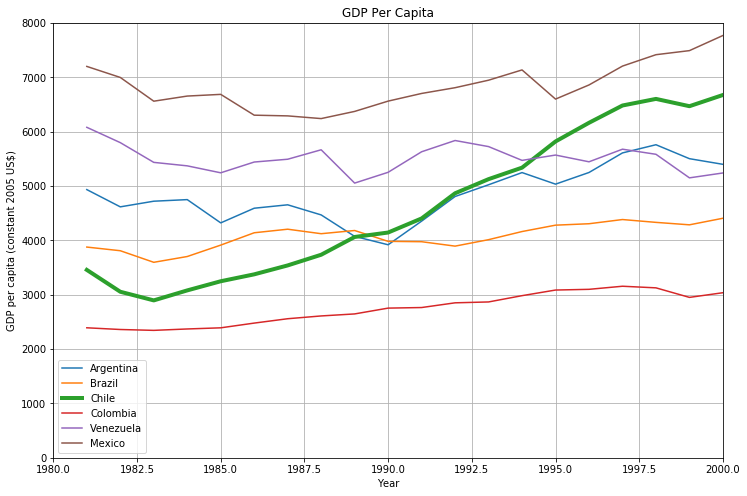

In [74]:
# line plot
plt.plot(gdp_ar['Year'].values, gdp_ar['Value'].values)
plt.plot(gdp_br['Year'].values, gdp_br['Value'].values)
plt.plot(gdp_ch['Year'].values, gdp_ch['Value'].values, linewidth=4)
plt.plot(gdp_co['Year'].values, gdp_co['Value'].values)
plt.plot(gdp_ve['Year'].values, gdp_ve['Value'].values)
plt.plot(gdp_mx['Year'].values, gdp_mx['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_br['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita')

# Include Legend
plt.legend(("Argentina", "Brazil", "Chile", "Colombia", "Venezuela", "Mexico"))

# to make more honest, start they y axis at 0
plt.axis([1980, 2000,0,8000])
plt.grid()
plt.show()

<p>During this 2 decades, a great stagnation is observed. </P>
<p>The remarcable exception is Chile, that changed its path (positivelly) when compared with other Latin American countries. Chile's GDP per capta doubled on this period. 

### LATAM at the new milennium 

In [75]:
# Filter for years after 2000 
filter_year = df[df.Year > 2000]

In [76]:
# select GDP Per capita for select countries
hist_indicator = 'GDP per capita \(constant 2005'
mask1 = filter_year['IndicatorName'].str.contains(hist_indicator)

mask2 = filter_year['CountryCode'].str.contains('ARG')
gdp_ar = filter_year[mask1 & mask2]

mask2 = filter_year['CountryCode'].str.contains('BRA')
gdp_br = filter_year[mask1 & mask2]

mask2 = filter_year['CountryCode'].str.contains('CHL')
gdp_ch = filter_year[mask1 & mask2]

mask2 = filter_year['CountryCode'].str.contains('COL')
gdp_co = filter_year[mask1 & mask2]

mask2 = filter_year['CountryCode'].str.contains('VEN')
gdp_ve = filter_year[mask1 & mask2]

mask2 = filter_year['CountryCode'].str.contains('MEX')
gdp_mx = filter_year[mask1 & mask2]

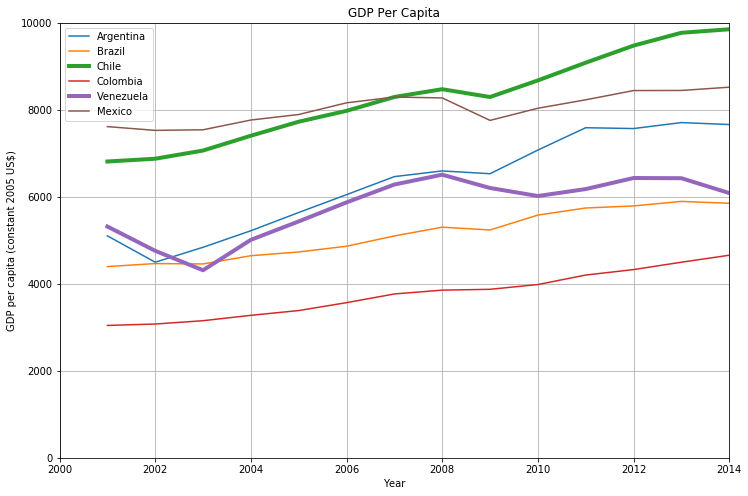

In [77]:
# line plot
plt.plot(gdp_ar['Year'].values, gdp_ar['Value'].values)
plt.plot(gdp_br['Year'].values, gdp_br['Value'].values)
plt.plot(gdp_ch['Year'].values, gdp_ch['Value'].values, linewidth=4)
plt.plot(gdp_co['Year'].values, gdp_co['Value'].values)
plt.plot(gdp_ve['Year'].values, gdp_ve['Value'].values, linewidth=4)
plt.plot(gdp_mx['Year'].values, gdp_mx['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_br['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita')

# Include Legend
plt.legend(("Argentina", "Brazil", "Chile", "Colombia", "Venezuela", "Mexico"))

plt.axis([2000, 2014,0,10000])
plt.grid()
plt.show()

<p>Argentina on 2000's restart growth</p>
<p>Mexico stop growth and stayed almost at same level during all time</p>
<p>Brazil and Colombia show steady growth</p>
<p>Venezuela in ups and downs stayed at same level</p>

### CONCLUSION

<p>Venezuela, used to be the richest country in the region on 60's, but on current path should be the worst before the end of this decade.</p>
<p>Chile showed notable growth and today is the highest regional GDP per capita</p> 

### Exploring Chilean x Venezuelan data

In [80]:
# select GDP Per capita for select countries
hist_indicator = 'GDP per capita \(constant 2005'
mask1 = df['IndicatorName'].str.contains(hist_indicator)

mask2 = df['CountryCode'].str.contains('CHL')
gdp_ch = df[mask1 & mask2]

mask2 = df['CountryCode'].str.contains('VEN')
gdp_ve = df[mask1 & mask2]

In [81]:
# Criate a LAC (Latin America & Caribbean) data for comparation
mask2 = df['CountryCode'].str.contains('LAC')
gdp_lac = df[mask1 & mask2]

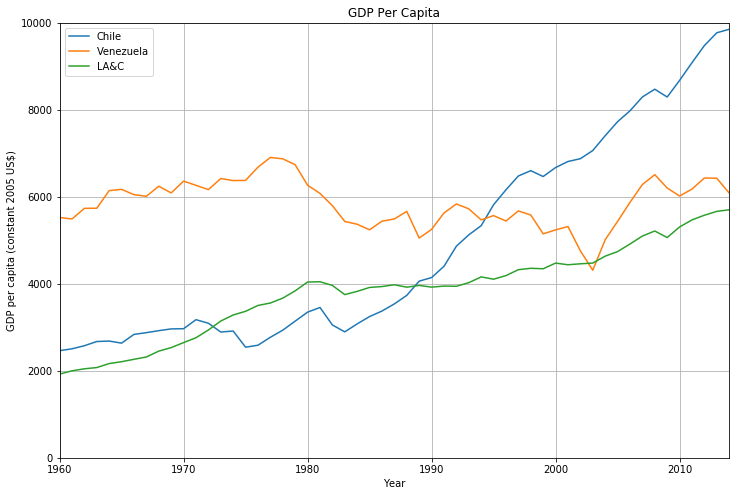

In [82]:
# line plot
plt.plot(gdp_ch['Year'].values, gdp_ch['Value'].values)
plt.plot(gdp_ve['Year'].values, gdp_ve['Value'].values)
plt.plot(gdp_lac['Year'].values, gdp_lac['Value'].values)


# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_ch['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita')

# Include Legend
plt.legend(("Chile", "Venezuela", "LA&C"))

# to make more honest, start they y axis at 0
plt.axis([1960, 2014,0,10000])
plt.grid()
plt.show()

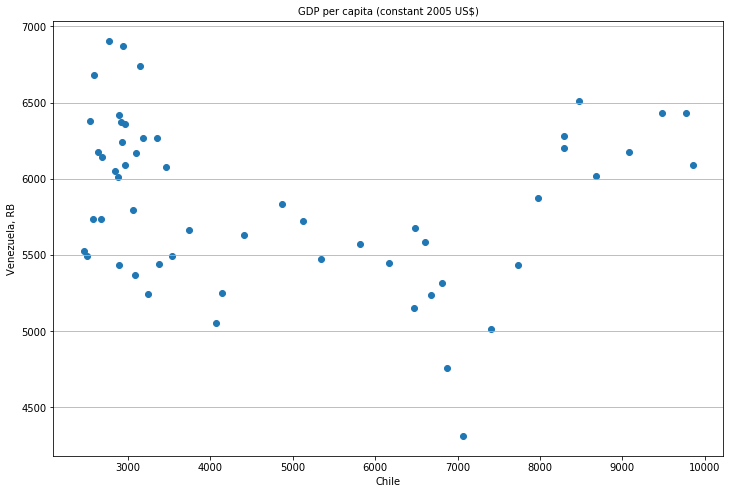

In [83]:
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title(gdp_br['IndicatorName'].iloc[0],fontsize=10)
axis.set_xlabel(gdp_ch['CountryName'].iloc[0],fontsize=10)
axis.set_ylabel(gdp_ve['CountryName'].iloc[0],fontsize=10)

X = gdp_ch['Value']
Y = gdp_ve['Value']

axis.scatter(X, Y)

==> No Correlation between Chile and Venezuela countries

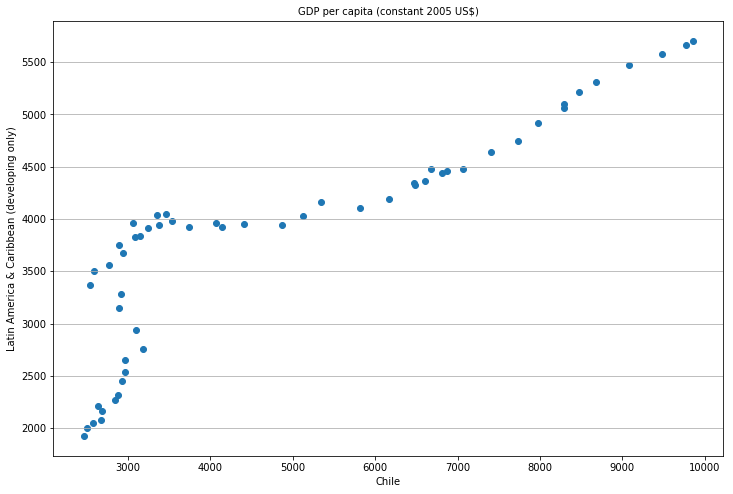

In [84]:
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title(gdp_br['IndicatorName'].iloc[0],fontsize=10)
axis.set_xlabel(gdp_ch['CountryName'].iloc[0],fontsize=10)
axis.set_ylabel(gdp_lac['CountryName'].iloc[0],fontsize=10)

X = gdp_ch['Value']
Y = gdp_lac['Value']

axis.scatter(X, Y)

 ==> Good Correlation between Chile and LAC Growth after 90's (GDP = $4,000)

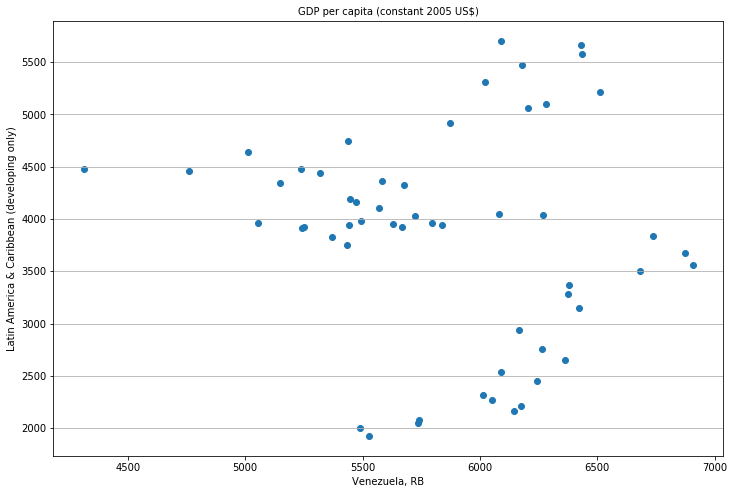

In [85]:
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title(gdp_br['IndicatorName'].iloc[0],fontsize=10)
axis.set_xlabel(gdp_ve['CountryName'].iloc[0],fontsize=10)
axis.set_ylabel(gdp_lac['CountryName'].iloc[0],fontsize=10)

X = gdp_ve['Value']
Y = gdp_lac['Value']

axis.scatter(X, Y)

 ==> NO Correlation between Venezuela and LAC Growth

## Analysing other indicators

### Exports of goods and services (current USD)

In [86]:
# select "Exports of goods and services (current US$)"
hist_indicator = 'NE.EXP.GNFS.CD'
mask1 = df['IndicatorCode'].str.contains(hist_indicator)

mask2 = df['CountryCode'].str.contains('CHL')
export_ch = df[mask1 & mask2]

mask2 = df['CountryCode'].str.contains('VEN')
export_ve = df[mask1 & mask2]

In [87]:
print("Max Chilean Export value:     ", max(export_ch['Value']))
print("Max Venezulean Export value: ", max(export_ve['Value']))

Max Chilean Export value:      95443274628.6658
Max Venezulean Export value:  112353159056.582


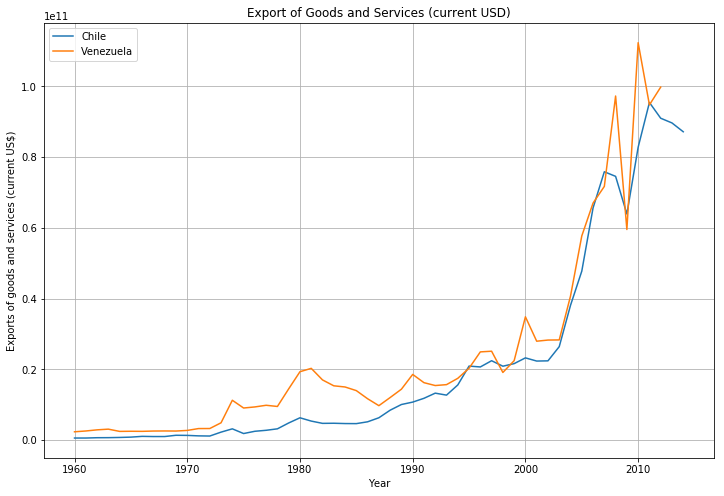

In [88]:
plt.plot(export_ch['Year'].values, export_ch['Value'].values)
plt.plot(export_ve['Year'].values, export_ve['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(export_ch['IndicatorName'].iloc[0])

#label the figure
plt.title('Export of Goods and Services (current USD)')

# Include Legend
plt.legend(("Chile", "Venezuela"))

# to make more honest, start they y axis at 0
#plt.axis([1960, 2014,-10,50])
plt.grid()
plt.show()

It is clear the correlation between both countries when we analyse Exports. This is understandable, because Chile is a big Copper exporter, once Venezuela is an Oil exporter. But, we can see that on 2nd half of 2000's Venueza exports were greater that Chile. So, seems that the country had more money, but why the GDP did not went up?

Let's see the "Gross national Expenduture"

### Gross national expenditure (current USD)

In [89]:
# select "Exports of goods and services (current US$)"
hist_indicator = 'NE.DAB.TOTL.CD'
mask1 = df['IndicatorCode'].str.contains(hist_indicator)

mask2 = df['CountryCode'].str.contains('CHL')
expend_ch = df[mask1 & mask2]

mask2 = df['CountryCode'].str.contains('VEN')
expend_ve = df[mask1 & mask2]

In [90]:
print("Max Chilean Expenduture value:    ", max(expend_ch['Value']))
print("Max Venezulean Expenduture value: ", max(expend_ve['Value']))

Max Chilean Expenduture value:     278489307070.009
Max Venezulean Expenduture value:  373895152355.8621


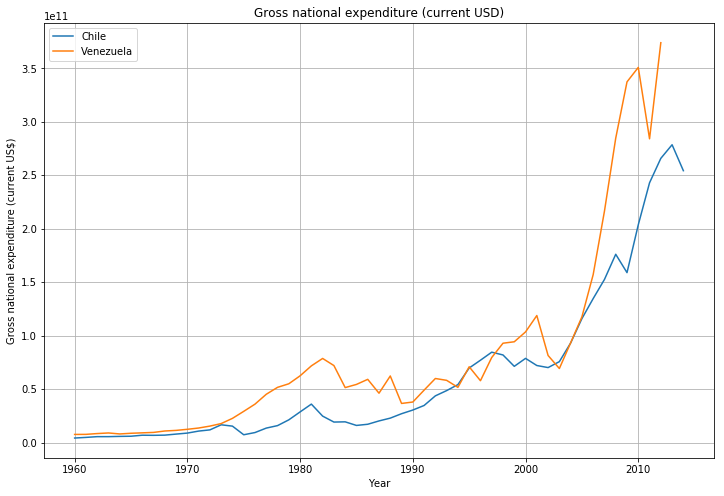

In [91]:
plt.plot(expend_ch['Year'].values, expend_ch['Value'].values)
plt.plot(expend_ve['Year'].values, expend_ve['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(expend_ch['IndicatorName'].iloc[0])

#label the figure
plt.title('Gross national expenditure (current USD)')

# Include Legend
plt.legend(("Chile", "Venezuela"))

plt.grid()
plt.show()

After 2005, seems that the total expendure of Venezula went to the roof! No control! What should explain on a simple way why their GDP per capta did not follow Chile otr at least the average of Latin America region. 

# General view of LATAM countries

### Country coordinates for plotting using Folium

source: https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json

In [92]:
country_geo = 'geo/world-countries.json'

## Visualize GDP per capita using Folium

### 2014

In [93]:
# select GDP per capta for all countries in 2014

hist_indicator = 'GDP per capita \(constant 2005'
mask1 = df['IndicatorName'].str.contains(hist_indicator)

mask2 = df['Year'].isin([2014])

stage = df[mask1 & mask2]

# Filter for LATAM countries (Max GDP ==> Chile)
stage = stage[stage.Value < 10000]
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534378,Arab World,ARB,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,4548.529662
5534629,Caribbean small states,CSS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,7458.860004
5535235,East Asia & Pacific (all income levels),EAS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,6465.238232
5535536,East Asia & Pacific (developing only),EAP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,3253.864486
5536815,Europe & Central Asia (developing only),ECA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,4723.500980


In [94]:
# Setup a folium map at a high-level zoom @Alok - what is the 100,0, doesn't seem like lat long
map = folium.Map(location=[100, 0], zoom_start=1.5)

In [95]:
plot_data = stage[['CountryCode','Value']]
plot_data.head()

,CountryCode,Value
5534378,ARB,4548.529662
5534629,CSS,7458.860004
5535235,EAS,6465.238232
5535536,EAP,3253.864486
5536815,ECA,4723.500980


In [96]:
# choropleth maps bind Pandas Data Frames and json geometries.  This allows us to quickly visualize data combinations
map.choropleth(country_geo, data=plot_data,
             columns=['CountryCode', 'Value'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator)

In [97]:
# Create Folium plot
map.save('plot_data.html')

In [98]:
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=700 height=450></iframe>')

### 1960

In [99]:
# select GDP per capta for all countries in 2014

hist_indicator = 'GDP per capita \(constant 2005'
mask1 = df['IndicatorName'].str.contains(hist_indicator)

mask2 = df['Year'].isin([1960])

stage = df[mask1 & mask2]

# Filter for LATAM countries (Max GDP ==> Venezuela)
stage = stage[stage.Value < 6000]
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
263,East Asia & Pacific (all income levels),EAS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,982.026842
376,East Asia & Pacific (developing only),EAP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,168.600612
1003,Heavily indebted poor countries (HIPC),HPC,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,424.892109
1436,Latin America & Caribbean (all income levels),LCN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,2316.355110
1566,Latin America & Caribbean (developing only),LAC,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,1924.846754


In [100]:
# Setup a folium map at a high-level zoom @Alok - what is the 100,0, doesn't seem like lat long
map = folium.Map(location=[100, 0], zoom_start=1.5)

In [101]:
plot_data_1960 = stage[['CountryCode','Value']]
plot_data_1960.head()

,CountryCode,Value
263,EAS,982.026842
376,EAP,168.600612
1003,HPC,424.892109
1436,LCN,2316.355110
1566,LAC,1924.846754


In [102]:
# choropleth maps bind Pandas Data Frames and json geometries.  This allows us to quickly visualize data combinations
map.choropleth(country_geo, data=plot_data_1960,
             columns=['CountryCode', 'Value'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator)

In [103]:
# Create Folium plot
map.save('plot_data_1960.html')

In [104]:
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data_1960.html width=700 height=450></iframe>')